## Investigation into the accuracy of Fandango's Movie Ratings

A journalist, Walt Hickey, discovered in 2015 that Fandango's movie ratings were suspicious and dishonest. Most ratings were rounded up the the nearest half-star score, while some were rounded up to the nearest full star score. We will be doing analysis of Fandango's movie ratings to determine if changes have been made to the displayed ratings on their websites to more accurately reflect the user's ratings.

We will to find out if Fandango has fixed the bug that they claimed was responsible for the inaccurate ratings.

In [2]:
import pandas as pd

before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
fandango_before = before[['FILM', 
                         'Fandango_Stars', 
                         'Fandango_Ratingvalue', 
                         'Fandango_votes', 
                         'Fandango_Difference']].copy()
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
fandango_after = after[['movie', 'year', 'fandango']].copy()
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Narrowing of scope of analysis

Instead of looking at all of the movie reviews in Fandango's database, we will be taking a look at periods before and after Hickey's article was published. We have two datasets, one with ratings for movies released in 2015 and one for movies released 2016 or later. The data was not taken at random, because there was certain criteria chosen so we get "popular" films. 

For the 2015 dataset:
* The film must have a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score.
* The film must have at least 30 fan reviews on Fandango (data pulled on 8/24/2015).

For the 2016-2017 dataset:
* The film must have a significant number of votes, doesn't specify what significant means.
* Data pulled on 3/22/2017

As a result of these criteria, the data is not representative of our population, so we will be picking a new population such that the data is a good representative of them.

1. Fandango's ratings of popular movies released in 2015
2. Fandango's ratings of popular movies released in 2016

Popular can mean a lot of things, but for the sake of this analysis we will be using Hickey's definition of at least 30 fan reviews on Fandango since that is what he used.

In [7]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [8]:
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [9]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
fandango_2015 = fandango_before[fandango_before['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [11]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

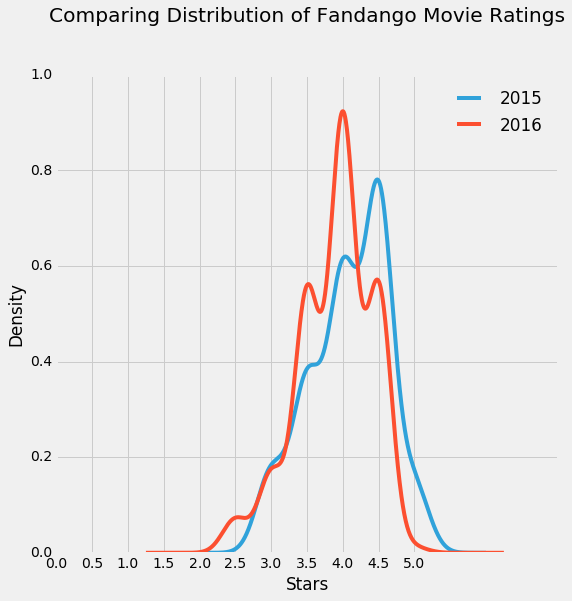

In [12]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,8))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title('Comparing Distribution of Fandango Movie Ratings', y=1.1)
plt.xlabel('Stars')
plt.ylabel('Density')
plt.xticks(arange(0,5.5,0.5))
plt.show()

## Observations on Fandango Ratings 2015 vs 2016

Both distributions are left skewed, but the 2016 distribution is shifted slightly to the left, about 0.5 stars. In general, movies on Fandango are rated very highly. Given that their business is selling movie tickets, it would be interesting to compare their ratings to other sites for the same movies to determine if there are any discrepancies.

In [13]:
print('2015')
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [14]:
print('2016')
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

There is a significantly lower percentage of movies receiving 4.5 and 5 star ratings in 2016 compared to 2015. in 2015 almost 7% of the movies received 5 stars while in 2016 it was less than 1%. In 2015 the lowest rating was 3 starts while in 2016 there are about 3% of movies that received 2.5 stars.

It is still evident that there is a difference between the two distributions and it still sppears that the ratings decreased from 2016 to 2015.

In [16]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


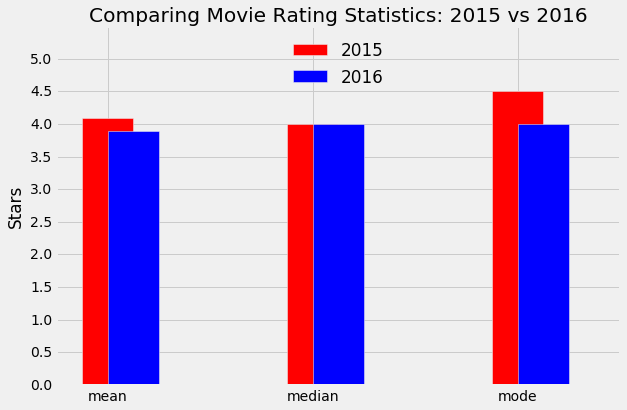

In [30]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(align='center', label='2015', width=0.25, color='#FF0000')
summary['2016'].plot.bar(align='edge', label='2016', width=0.25, rot=0, color='#0000FF', figsize=(9,6))

plt.ylim(0,5.5)
plt.ylabel('Stars')
plt.yticks(arange(0,5.5,0.5))
plt.legend(loc='upper center', framealpha=0)
plt.title('Comparing Movie Rating Statistics: 2015 vs 2016')
plt.show()

Although the median is the same for the two years, the mean and mode of the ratings is lower in 2016. This confirms the direction of the change that we saw in previous analysis. The ratings in 2016 are generally lower than in 2015.

## Conclusion

Our analysis suggests that there is a difference between the Fandango movie ratings for popular movies in 2015 and 2016. We do not have enough details to determine the reason for the differences, but it could be because of Hickey's article.

We could do some further analysis by comparing Fandango's ratings to the ratings from other sites. It is a possibility that movies that came out in 2016 were simply not as good as those that came out in 2015.